In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from pathlib import Path

c:\Users\kol\Miniconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\kol\Miniconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\kol\Miniconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\kol\Miniconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dty

In [42]:
def imshow(im, cmap='normal'):
    plt.figure()
    plt.axis('off')
    plt.imshow(np.squeeze(im), cmap=cmap)

def get_images_from_event(fn, tag_like='image/'):
    image_str = tf.placeholder(tf.string)
    im_tf = tf.image.decode_image(image_str)

    images = []
    with tf.Session() as sess:
        for e in tf.train.summary_iterator(fn):
            for v in e.summary.value:
                if not tag_like or tag_like in v.tag:
                    im = im_tf.eval({image_str: v.image.encoded_image_string})
                    images.append((v.tag,im))
    return images

In [3]:
files = [f for f in Path('../logs/monodepth').glob('*.tfevents.*')]
files = sorted(files, key=lambda f: int(f.name.split('.')[3]), reverse=True)
if not files:
    raise Exception('No files found')
str(files[0])

'..\\logs\\monodepth\\events.out.tfevents.1675180347.KOL-PC'

In [44]:
images = get_images_from_event(str(files[0]))
tags = np.unique([x[0] for x in images])
tags

array(['disp_left_est_0/image/0', 'disp_left_est_0/image/1',
       'disp_left_est_0/image/2', 'disp_left_est_0/image/3',
       'disp_left_est_1/image/0', 'disp_left_est_1/image/1',
       'disp_left_est_1/image/2', 'disp_left_est_1/image/3',
       'disp_left_est_2/image/0', 'disp_left_est_2/image/1',
       'disp_left_est_2/image/2', 'disp_left_est_2/image/3',
       'disp_left_est_3/image/0', 'disp_left_est_3/image/1',
       'disp_left_est_3/image/2', 'disp_left_est_3/image/3',
       'disp_right_est_0/image/0', 'disp_right_est_0/image/1',
       'disp_right_est_0/image/2', 'disp_right_est_0/image/3',
       'disp_right_est_1/image/0', 'disp_right_est_1/image/1',
       'disp_right_est_1/image/2', 'disp_right_est_1/image/3',
       'disp_right_est_2/image/0', 'disp_right_est_2/image/1',
       'disp_right_est_2/image/2', 'disp_right_est_2/image/3',
       'disp_right_est_3/image/0', 'disp_right_est_3/image/1',
       'disp_right_est_3/image/2', 'disp_right_est_3/image/3'],
      d

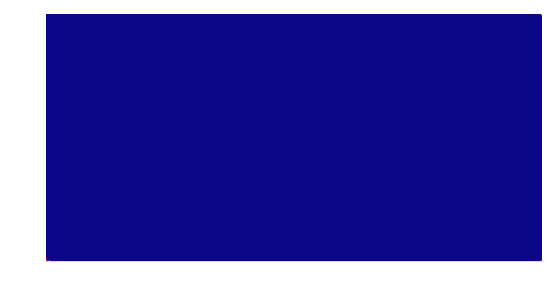

In [45]:
imshow(images[0][1], 'plasma')